<a href="https://colab.research.google.com/github/jaedeokhan/20_1_AI_Introduce/blob/master/pratice/0519TUE_Lab_overfitting_before.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow_gpu==2.0.0

In [2]:
pip install keras==2.3.1

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
len(train_data)

25000

In [6]:
len(test_data)

25000

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

# ==> Insert your code here
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))


original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [11]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.4247 - accuracy: 0.8256 - val_loss: 0.3305 - val_accuracy: 0.8751
Epoch 2/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.2485 - accuracy: 0.9102 - val_loss: 0.2879 - val_accuracy: 0.8863
Epoch 3/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.1936 - accuracy: 0.9315 - val_loss: 0.3582 - val_accuracy: 0.8566
Epoch 4/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.1623 - accuracy: 0.9425 - val_loss: 0.3439 - val_accuracy: 0.8668
Epoch 5/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.1393 - accuracy: 0.9515 - val_loss: 0.3201 - val_accuracy: 0.8768
Epoch 6/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.1186 - accuracy: 0.9592 - val_loss: 0.3557 - val_accuracy: 0.8697
Epoch 7/20
25000/25000 [==============================] - 2s 83us/st

In [0]:
# ==> Insert your code here
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000, )))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [13]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.5993 - acc: 0.6997 - val_loss: 0.4997 - val_acc: 0.8323
Epoch 2/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.3931 - acc: 0.8856 - val_loss: 0.3561 - val_acc: 0.8812
Epoch 3/20
25000/25000 [==============================] - 2s 83us/step - loss: 0.2786 - acc: 0.9122 - val_loss: 0.3023 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.2209 - acc: 0.9255 - val_loss: 0.2834 - val_acc: 0.8894
Epoch 5/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.1870 - acc: 0.9353 - val_loss: 0.2807 - val_acc: 0.8885
Epoch 6/20
25000/25000 [==============================] - 2s 81us/step - loss: 0.1634 - acc: 0.9442 - val_loss: 0.2884 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 2s 82us/step - loss: 0.1462 - acc: 0.9511 - val_loss: 0.2996 - val_acc

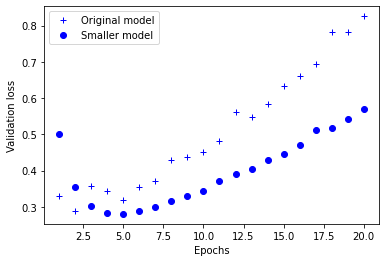

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
# ==> Insert your code here
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000, )))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [22]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.5554 - accuracy: 0.7842 - val_loss: 0.2986 - val_accuracy: 0.8838
Epoch 2/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.2271 - accuracy: 0.9109 - val_loss: 0.3377 - val_accuracy: 0.8629
Epoch 3/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.1214 - accuracy: 0.9566 - val_loss: 0.4425 - val_accuracy: 0.8463
Epoch 4/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.0744 - accuracy: 0.9823 - val_loss: 0.4425 - val_accuracy: 0.8851
Epoch 5/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.0860 - accuracy: 0.9862 - val_loss: 0.4767 - val_accuracy: 0.8840
Epoch 6/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.0837 - accuracy: 0.9857 - val_loss: 0.4345 - val_accuracy: 0.8810
Epoch 7/20
25000/25000 [==============================] - 2s 99us/s

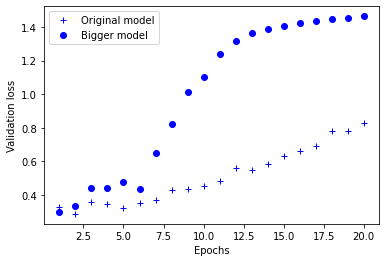

In [23]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

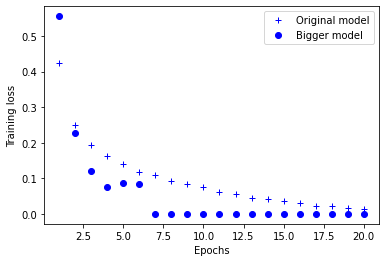

In [24]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()